<a href="https://colab.research.google.com/github/riarahmasp/B_Study-Case_2/blob/main/Kelompok_B_Study_Case_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h2><strong><font color="blue">Study Case 02 - Data Mining dan Business Intelligence:
MixITup Ice Cream</font></strong></h2></center>

## **Kasus**

* **MixITup** adalah perusahaan rintisan yang dimotori para anak muda yang bergerak di bidang usaha Ice Cream, Boba Drinks, dan Desserts (snacks)
* Saat ini **MixITup** memiliki 3 cabang di Jakarta, Depok, dan Tangerang. **MixITup** mendapat respon positif di masyarakat, antrian dine-in dan pesan-antar produk **MixITup** melebihi kapasitas pelayanan.
* Bulan lalu **MixITup** mendapatkan pendanaan seri B sebesar Rp. 33 Milyar,-
* Rencananya **MixITup** ingin "scale" business-nya ke kota lain dan melakukan massive marketing.
* Melalui iming-iming diskon 5% untuk beberapa item di tokonya dan pembagian voucher promo diskon, **MixITup** berhasil mengumpulkan data pelanggan melalui kartu membernya (loyality program).
* Sebagai Data Analyst junior di **MixITup**, kami akan melakukan proses Data Mining dan memberikan informasi/insight dan saran/rekomendasi/strategi ke perusahaan via data.

* Agar memudahkan upper management, kami membuat presentasi dalam format *google slides* yang dapat ditampilkan juga pada rapat direksi untuk memberikan insight dari data, presentasi dapat diakses pada link berikut: https://docs.google.com/presentation/d/1RiiVO9Afj2rwFE_BN09zYEdYchQOVugTrq9GnmHr0P4/edit?usp=sharing 

## **PRE-PROCESSING DATA**

In [ ]:
pip install umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
try:
    import google.colab; IN_COLAB = True
    !pip install umap-learn
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

import tau_unsup as tau

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-10-07 08:34:17--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.1’

tau_unsup.py.1      100%[===================>]  16.98K  --.-KB/s    in 0.001s  

2022-10-07 08:34:17 (26.8 MB/s) - ‘tau_unsup.py.1’ saved [17387/17387]



In [ ]:
#Import Modules yang diperlukan

import warnings; warnings.simplefilter('ignore')
import umap, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

sns.set(style='ticks', color_codes=True)
random_state=99

In [ ]:
import pandas as pd
import umap.umap_ as umap

url = 'https://raw.githubusercontent.com/riarahmasp/B_Study-Case_2/main/Study_Case_2.csv'
data = pd.read_csv(url)
data.head()

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,"Rp13,114,754",52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,"Rp33,606,557",86,1,Depok,1.0,Minggu,6
2,103,Pria,51,"Rp15,983,606",41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,"Rp12,704,918",55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,"Rp20,081,967",42,1,Jakarta,2.0,Senin,8


Sebelum melakukan analisis lanjutan, sebaiknya dilakukan pengecekan informasi masing-masing dataframe untuk melihat data yang tidak lengkap/salah tipenya

In [ ]:
# Melihat Informasi Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    object 
 3   Pendapatan-per-bulan  200 non-null    object 
 4   skor-pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 15.8+ KB


### **Checking Data Types**

Sebelum melakukan analisis lanjutan, sebaiknya dilakukan pengecekan informasi masing-masing dataframe untuk melihat data yang tidak lengkap atau salah tipenya. Dalam kasus ini, tindakan yang kami lakukan adalah sebagai berikut.
- Objek-objek seperti koma (,) dan "Rp" dari nilai-nilai pada kolom Pendapatan-per-bulan dihapus.
- Kolom Pendapatan-per-bulan diubah dari object menjadi float karena nilai dari kolom tersebut akan digunakan numeriknya.


In [ ]:
#Mengubah format penulisan pada kolom "Pendapatan-per-bulan"

data['Pendapatan-per-bulan'] = data['Pendapatan-per-bulan'].str.replace(',', '')
data['Pendapatan-per-bulan'] = data['Pendapatan-per-bulan'].str.replace('Rp', '')

In [ ]:
#Mengubah tipe data kolom "Pendapatan-per-bulan"

data['Pendapatan-per-bulan']=data['Pendapatan-per-bulan'].astype('float64')
data['Promo']=data['Promo'].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    200 non-null    int64   
 1   Jenis Kelamin         196 non-null    object  
 2   Umur                  200 non-null    object  
 3   Pendapatan-per-bulan  200 non-null    float64 
 4   skor-pengeluaran      200 non-null    int64   
 5   Menikah               188 non-null    object  
 6   Kota                  200 non-null    object  
 7   Promo                 194 non-null    category
 8   HariFav               200 non-null    object  
 9   FavFlavor             200 non-null    int64   
dtypes: category(1), float64(1), int64(3), object(5)
memory usage: 14.6+ KB


### **Duplicate Values**

Duplicate values dapat dideteksi dengan `data.shape`. Pada data, tidak terdapat duplicate values yang terdeteksi. 

In [ ]:
#DROPPING VARIABLES

#Drop duplicates
data.shape #(lihat shape)
data.drop_duplicates()
data.shape #recheck shape


(200, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    200 non-null    int64   
 1   Jenis Kelamin         196 non-null    object  
 2   Umur                  200 non-null    object  
 3   Pendapatan-per-bulan  200 non-null    float64 
 4   skor-pengeluaran      200 non-null    int64   
 5   Menikah               188 non-null    object  
 6   Kota                  200 non-null    object  
 7   Promo                 194 non-null    category
 8   HariFav               200 non-null    object  
 9   FavFlavor             200 non-null    int64   
dtypes: category(1), float64(1), int64(3), object(5)
memory usage: 14.6+ KB


### **Missing Values**

- Terdapat beberapa missing values pada kolom pada data, diantaranya kolom `Jenis Kelamin`, dan `Menikah`
- Untuk kolom diatas yang mengalami missing values akan ditangani dengan melakukan drop baris karena secara total hanya ada 16 data points yang terdapat missing values atau sekitar 8% dari total data, maka kita putuskan untuk menghapus missing values.

In [ ]:
#HANDLE MISSING VALUES

mod_df = data.dropna( how='any',
                    subset=['Menikah','Jenis Kelamin','Promo'])
print("Modified Dataframe : ")
print(mod_df)

data = mod_df

Modified Dataframe : 
      ID Jenis Kelamin Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
0    101        Wanita   49            13114754.0                52       1   
1    102        Wanita   32            33606557.0                86       1   
2    103          Pria   51            15983606.0                41       1   
3    104          Pria   19            12704918.0                55       0   
4    105        Wanita   38            20081967.0                42       1   
..   ...           ...  ...                   ...               ...     ...   
195  296          Pria   31             4098360.0                73       1   
196  297          Pria   57            15983606.0                51       1   
197  298        Wanita   35            43032786.0                79       1   
198  299        Wanita   23             1229508.0                94       1   
199  300          Pria   50             1639344.0                14       1   

          Kota Promo HariFav 

In [ ]:
#Isi missing value untuk tipe data float64 dengan rata-rata
data_input_mean = data.fillna(data.mean()) #kalo udah yakin pake inplace = True

In [ ]:
data = data_input_mean
data.isnull().sum()

ID                      0
Jenis Kelamin           0
Umur                    0
Pendapatan-per-bulan    0
skor-pengeluaran        0
Menikah                 0
Kota                    0
Promo                   0
HariFav                 0
FavFlavor               0
dtype: int64

###Noise

In [ ]:
#Memeriksa Noise Value
data_cat = data.select_dtypes(include = ['category','object'])
for col in data_cat.columns:
    print(col,': ', set(data[col].unique()))


Jenis Kelamin :  {'Pria', 'Wanita', '-'}
Umur :  {'37', '36', '54', '38', '51', '33', '55', '43', '42', '24', '18', '29', '31', '52', '25', '2', '32', '49', '56', '20', '41', '28', '57', '21', '40', '39', '53', '50', '60', '45', '30', '59', '26', '23', '48', '58', '19', '47', '27', '35', '44', '34', '46', '22'}
Menikah :  {'1', '0', '-'}
Kota :  {'Depok', 'Jakarta', 'Tangerang', 'JJakarta'}
Promo :  {0.0, 1.0, 2.0, 3.0, 5.0}
HariFav :  {'Minggu', 'Jumat', 'Rabu', 'Senin', 'Kamis', 'Selasa', 'Sabtu'}


In [ ]:
#Terdapat noise value seperti jenis kelamin yang memiliki value "-", kolom menikah memiliki value "-", kolom FavFlavor yang memiliki value "9" 
#dimana tidak ada flavor dengan index 9, serta penulisan pada "JJakarta" pada kolom Kota

#Menghapus Noise Value
index_noise=data[(data['Jenis Kelamin'] == '-')|(data['Menikah']==' ')|(data['Menikah']=='-')|(data['FavFlavor']=='9')|(data['Promo']==5.0)].index
data.drop(index_noise , inplace=True)
data[data.eq("JJakarta").any(1)]
data.at[193,'Kota']= 'Jakarta'

for col in data_cat.columns:
    print(col,': ', set(data[col].unique()))

Jenis Kelamin :  {'Pria', 'Wanita'}
Umur :  {'37', '36', '54', '38', '51', '33', '55', '43', '42', '24', '18', '29', '31', '52', '25', '2', '32', '49', '56', '20', '41', '28', '57', '21', '40', '39', '53', '50', '60', '45', '30', '59', '26', '23', '48', '58', '19', '47', '27', '35', '44', '34', '46', '22'}
Menikah :  {'1', '0'}
Kota :  {'Depok', 'Jakarta', 'Tangerang'}
Promo :  {0.0, 1.0, 2.0, 3.0}
HariFav :  {'Minggu', 'Jumat', 'Rabu', 'Senin', 'Kamis', 'Selasa', 'Sabtu'}


##Outliers

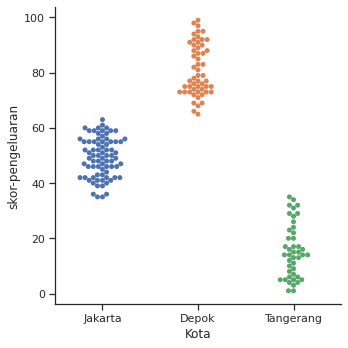

In [ ]:
#HANDLE OUTLIERS

#Cek outliers
#Visualisasi ngeliat outliers

#Catplot
p_coba = sns.catplot(x = 'Kota', y = 'skor-pengeluaran', data = data, kind='swarm')

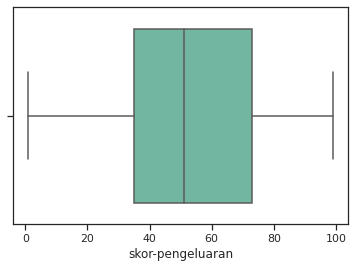

In [ ]:
#Memeriksa outlier dengan boxplot
ax = sns.boxplot(data['skor-pengeluaran'], orient="h", palette="Set2")

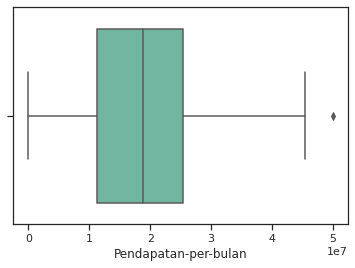

In [ ]:
ax = sns.boxplot(data["Pendapatan-per-bulan"], orient="h", palette="Set2")
#terdapat outlier pada kolom "Pendapatan-per-bulan". dapat diatasi dengan memisahkan outlier dari data, tetapi tetap dilaporkan.

Langkah preprocessing selanjutnya yang dilakukan adalah mendeteksi outliers. Outliers adalah titik observasi yang memiliki nilai cenderung berbeda jauh dari titik-titik observasi lainnya. Hasil dari pendeteksian outlier adalah sebagai berikut:
- Variabel kota dan skor pengeluaran tidak memiliki outlier berdasarkan grafik catplot.
- Grafik boxplot untuk skor pengeluaran tidak memiliki outlier.
- Grafik boxplot untuk pendapatan per bulan memiliki satu outlier. Outlier ini dapat dipisahkan dari data, tetapi tetap dilaporkan.


## **EDA**

Yang ingin dijawab:


1.   Kota mana yang cocok untuk dibangun cabang usaha
2.   Marketing apa yang sesuai untuk usaha
3. Promo produk apa yang harus disediakan di hari tertentu 
4. Produk apa yang diminati oleh kalangan tertentu, mungkin berdasarkan kota, jenis kelamin, pendapatan (ini sabi pake clustering)
5. Spending power tiap kota, kota mana yang berpotensi lebih suka jajan dibanding yang lain



In [ ]:
data.describe()

,ID,Pendapatan-per-bulan,skor-pengeluaran,FavFlavor
count,175.000000,1.750000e+02,175.000000,175.000000
mean,200.434286,1.868384e+07,50.651429,3.554286
std,58.022241,1.054117e+07,25.936011,2.768080
min,101.000000,0.000000e+00,1.000000,0.000000
25%,151.500000,1.127049e+07,35.000000,1.000000
50%,200.000000,1.885246e+07,51.000000,3.000000
75%,252.000000,2.540984e+07,73.000000,6.000000
max,300.000000,5.000000e+07,99.000000,9.000000


'\nDari grafik di bawah, terlihat bahwa terdapat kecenderungan customer untuk menggunakan promo pada hari-hari tertentu tetapi kecenderungan tersebut tidak sama pada setiap kota. \nDi kota Depok, customer cenderung lebih sering menggunakan promo pada hari Senin. Di kota Jakarta, customer cenderung lebih sering menggunakan promo pada hari Senin, Sabtu, dan \nMinggu. Sedangkan di kota Tangerang, customer cenderung lebih sering menggunakan promo pada hari Sabtu.\n'

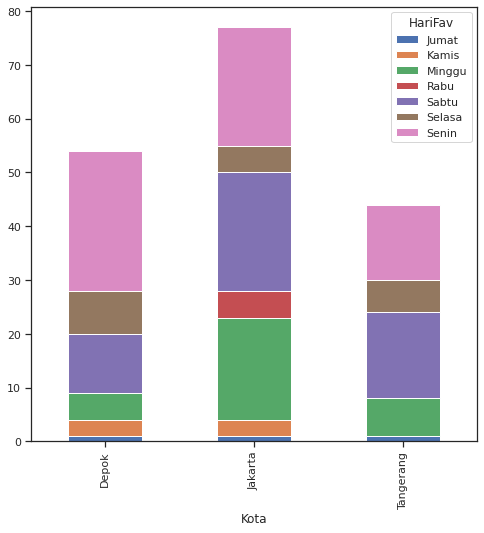

In [ ]:
#Apakah ada kecenderungan customer di hari tertentu untuk lebih sering menggunakan promo?

CT = pd.crosstab(index=data["Kota"], columns=data["HariFav"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

"""
Dari grafik di bawah, terlihat bahwa terdapat kecenderungan customer untuk menggunakan promo pada hari-hari tertentu tetapi kecenderungan tersebut tidak sama pada setiap kota. 
Di kota Depok, customer cenderung lebih sering menggunakan promo pada hari Senin. Di kota Jakarta, customer cenderung lebih sering menggunakan promo pada hari Senin, Sabtu, dan 
Minggu. Sedangkan di kota Tangerang, customer cenderung lebih sering menggunakan promo pada hari Sabtu.
"""

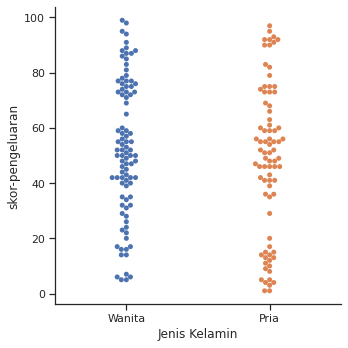

In [ ]:
p2 = sns.catplot(x = 'Jenis Kelamin', y = 'skor-pengeluaran', data = data,kind = "swarm")

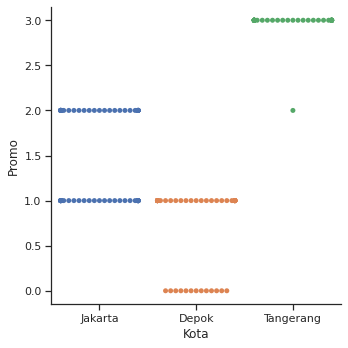

In [ ]:
p = sns.catplot(x = 'Kota', y = 'Promo', data = data,kind = "swarm")

'\nMenurut kami, untuk menentukan strategi pemasaran dari data yang dimiliki, perlu untuk melihat penggunaan promo terhadap spending power (pengeluaran). \nDari catplot di samping, terlihat bahwa semakin tinggi skor pengeluaran seorang customer, akan semakin jarang customer tersebut menggunakan promo, \nsehingga benar adanya promo tersebut mempengaruhi skor pengeluaran.\n'

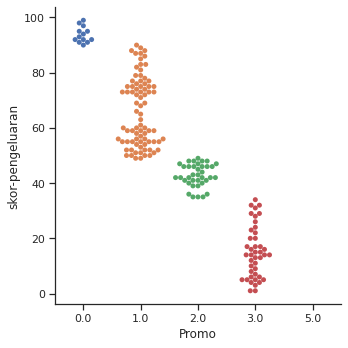

In [ ]:
#Strategi pemasaran apa yang harus digunakan untuk menambahkan revenue bagi usaha?

p1 = sns.catplot(x = 'Promo', y = 'skor-pengeluaran', data = data,kind = "swarm")

"""
Menurut kami, untuk menentukan strategi pemasaran dari data yang dimiliki, perlu untuk melihat penggunaan promo terhadap spending power (pengeluaran). 
Dari catplot di samping, terlihat bahwa semakin tinggi skor pengeluaran seorang customer, akan semakin jarang customer tersebut menggunakan promo, 
sehingga benar adanya promo tersebut mempengaruhi skor pengeluaran.
"""

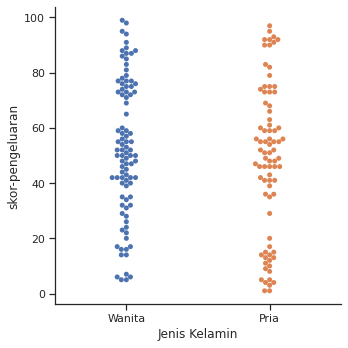

In [ ]:
p2 = sns.catplot(x = 'Jenis Kelamin', y = 'skor-pengeluaran', data = data,kind = "swarm")

In [ ]:
#Kota mana yang berpotensi lebih suka jajan (memiliki spending power lebih tinggi) dibanding kota yang lain?

"""
Dapat kita lihat dari spending power customer pada masing-masing kota, dengan menggunakan catplot untuk melihat persebaran data pointsnya.
Customer di Depok cenderung lebih sering untuk melakukan spending (pengeluaran) dibandingkan Jakarta dan Tangerang (dengan spending power ~60-100) tergolong lebih tinggi   
hal tersebut dapat menjadi salah satu indikator kota terbaik untuk membuka cabang usaha baru.

Dapat kita lihat dari spending power customer pada masing-masing kota, dengan menggunakan catplot untuk melihat persebaran data pointsnya.
Customer di Depok cenderung lebih sering untuk melakukan spending (pengeluaran) dibandingkan Jakarta dan Tangerang (dengan spending power ~60-100) tergolong lebih tinggi   
hal tersebut dapat menjadi salah satu indikator kota terbaik untuk membuka cabang usaha baru.
"""


'\nDapat kita lihat dari spending power customer pada masing-masing kota, dengan menggunakan catplot untuk melihat persebaran data pointsnya.\nCustomer di Depok cenderung lebih sering untuk melakukan spending (pengeluaran) dibandingkan Jakarta dan Tangerang (dengan spending power ~60-100) tergolong lebih tinggi   \nhal tersebut dapat menjadi salah satu indikator kota terbaik untuk membuka cabang usaha baru.\n\nDapat kita lihat dari spending power customer pada masing-masing kota, dengan menggunakan catplot untuk melihat persebaran data pointsnya.\nCustomer di Depok cenderung lebih sering untuk melakukan spending (pengeluaran) dibandingkan Jakarta dan Tangerang (dengan spending power ~60-100) tergolong lebih tinggi   \nhal tersebut dapat menjadi salah satu indikator kota terbaik untuk membuka cabang usaha baru.\n'

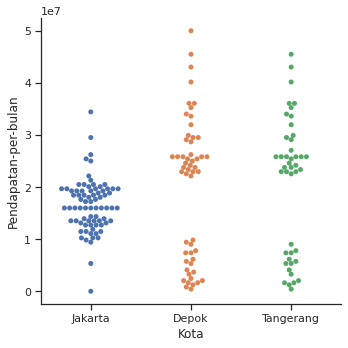

In [ ]:
p= sns.catplot(x="Kota", y="Pendapatan-per-bulan",  kind="swarm", data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6bc428fd0>,
      dtype=object)

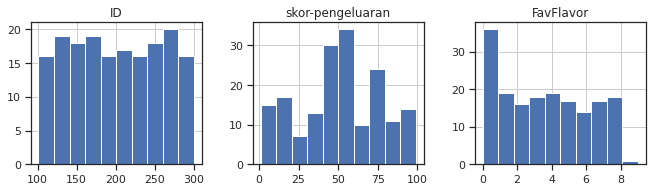

In [ ]:
numerical = data.select_dtypes(include = ['int64']).columns

data[numerical].hist(figsize=(15, 6), layout=(2, 4))

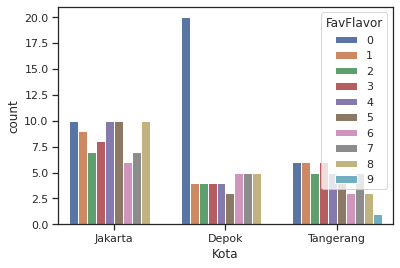

In [ ]:
plot = sns.countplot(data = data, x = "Kota", hue = "FavFlavor")

In [ ]:
#1&5, pake fungsi count kota
#mungkin bisa diliat ke kota yg dikit cabangnya, rekomendasikan disitu.
#cek spending power (skor pengeluaran) masyarakat kota tsb, kalo tinggi, gas.

#2-4, segregasi konsumen per kota. cek harifav, flavorfav, & promo

## **CLUSTERING ANALYSIS**

In [ ]:
data['Kota'] = data['Kota'].astype('category')
data['HariFav'] = data['HariFav'].astype('category')
data['FavFlavor'] = data['FavFlavor'].astype('category')

In [ ]:
data['Umur']=data['Umur'].astype('float64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    175 non-null    int64   
 1   Jenis Kelamin         175 non-null    object  
 2   Umur                  175 non-null    float64 
 3   Pendapatan-per-bulan  175 non-null    float64 
 4   skor-pengeluaran      175 non-null    int64   
 5   Menikah               175 non-null    object  
 6   Kota                  175 non-null    category
 7   Promo                 175 non-null    category
 8   HariFav               175 non-null    category
 9   FavFlavor             175 non-null    category
dtypes: category(4), float64(2), int64(2), object(2)
memory usage: 15.4+ KB


In [ ]:
#MENENTUKAN NILAI K OPTIMUM

#Membagi jenis data based on data type,
cat_var = data[['Kota','HariFav','FavFlavor']].values #Data kategori
cont_var = data[['Umur','skor-pengeluaran','Pendapatan-per-bulan']].values #Data numerik kontinu

In [ ]:
data.head()

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754.0,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557.0,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606.0,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918.0,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967.0,42,1,Jakarta,2.0,Senin,8


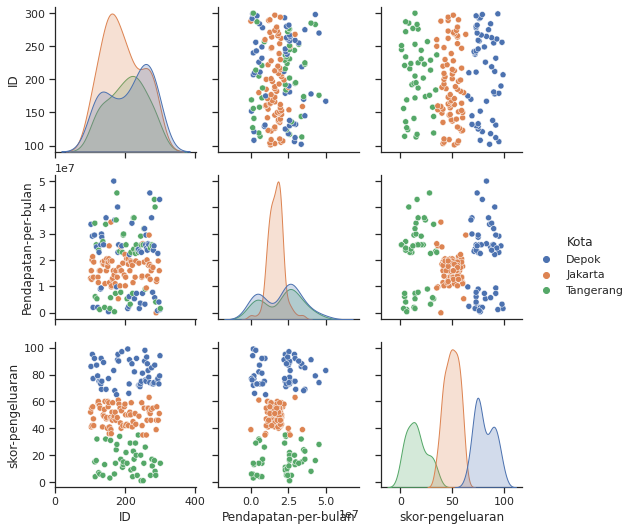

In [ ]:
g = sns.pairplot(data, hue='Kota')

Text(0.5, 1.0, 'Elbow curve')

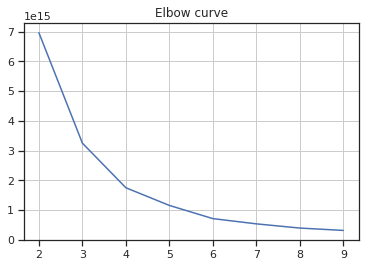

In [ ]:
#OPTIMAL NUMBER OF CLUSTERS

distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(cont_var)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

Diperoleh nilai k-optimum = 4

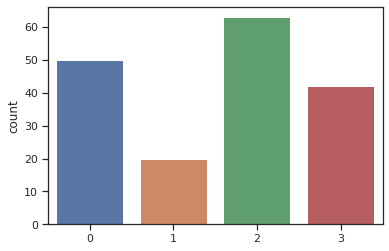

In [ ]:
#k-means clustering
k = 4
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, 
                    random_state = 99)
km.fit(cont_var)
# Hasil clusteringnya
C_km = km.predict(cont_var)
p= sns.countplot(C_km)

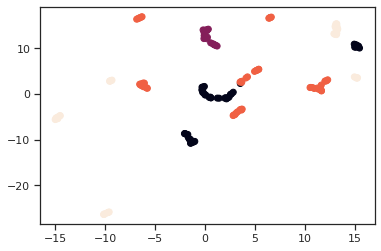

In [ ]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(cont_var)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_km)
plt.show()

In [ ]:
#didapatkan nilai optimum k = 4

array([1, 0, 1, 1, 1, 3, 3, 2, 1, 1], dtype=int32)

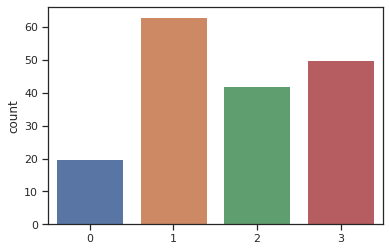

In [ ]:
#K-MEANS++ CLUSTERING

#Countplot
k=4
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPP.fit(cont_var)
C_kmpp = kmPP.predict(cont_var)

sns.countplot(C_kmpp)
C_kmpp[:10]


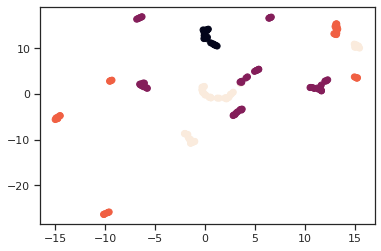

In [ ]:
#SubPlot
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp)
plt.show()

Evaluation of KMeans with k-means++ init
Evaluation of KMeans with random init
Evaluation of MiniBatchKMeans with k-means++ init
Evaluation of MiniBatchKMeans with random init


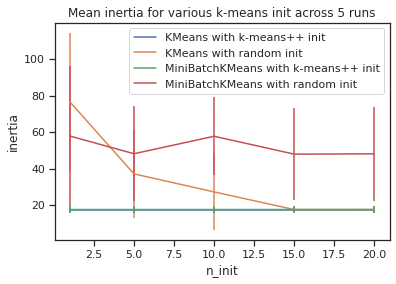

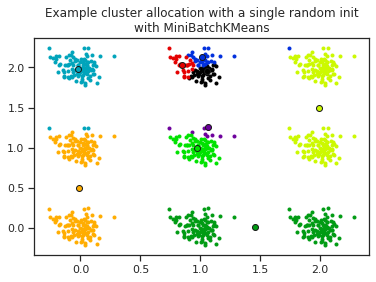

In [ ]:
tau.km_initializations()

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


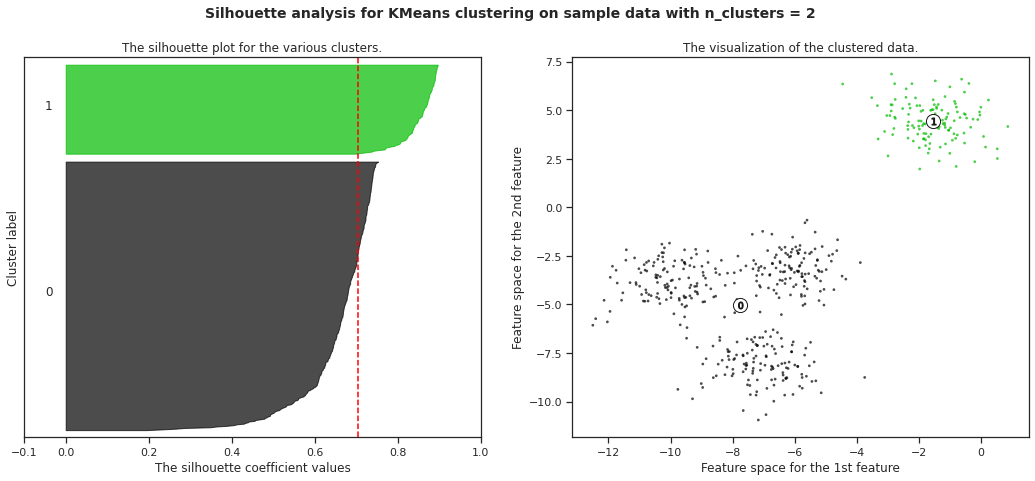

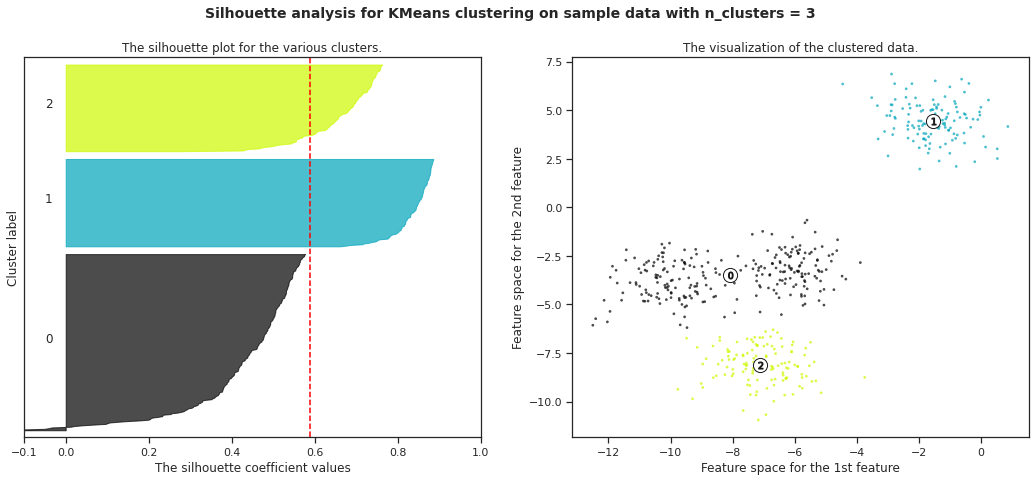

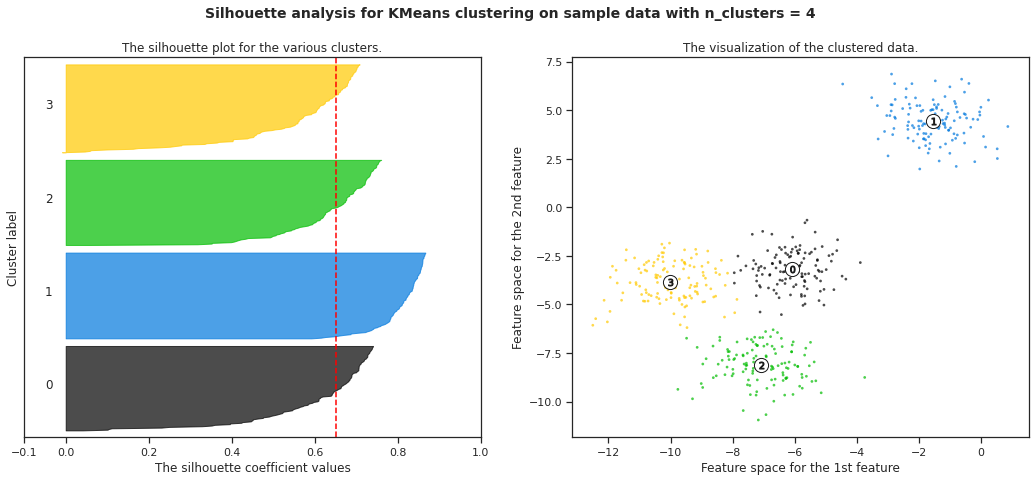

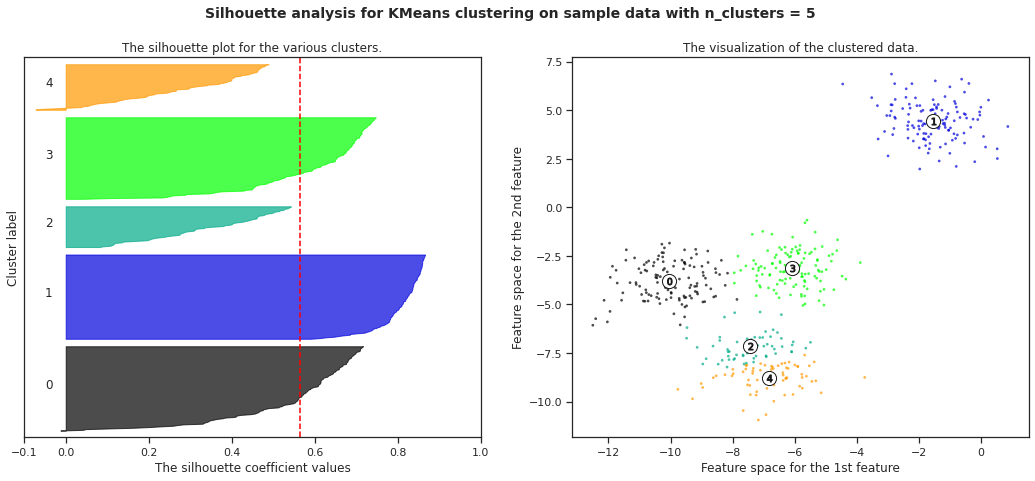

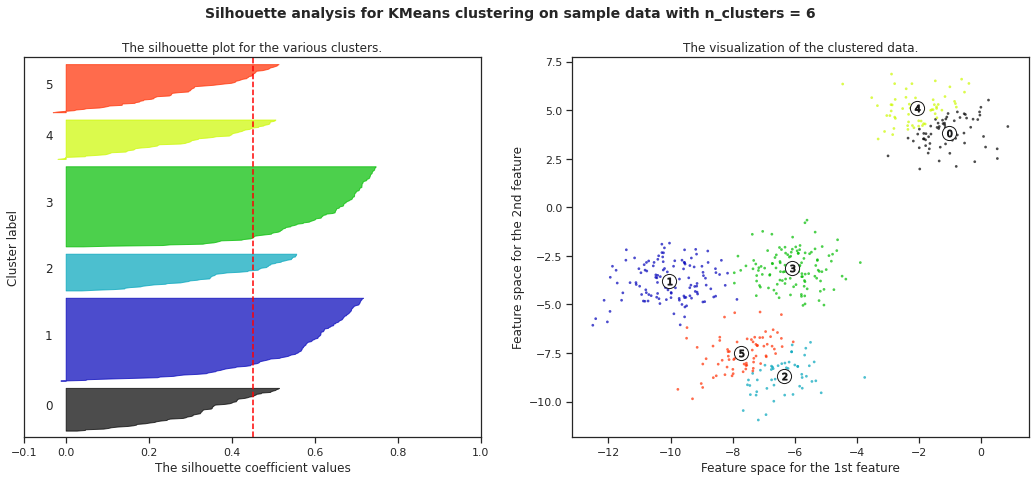

In [ ]:
tau.sil_based_optimal_km()

In [ ]:
#Evaluasi : Internal . Contoh Silouette Coefficient ==> warning hanya cocok untuk k-means (centroid-based clustering)
Hasil_Clustering = [C_km, C_kmpp]
for res in Hasil_Clustering:
    print(siluet(cont_var,res), end=', ')

0.5782862349835932, 0.5782862349835932, 

In [ ]:
kmPP.cluster_centers_

array([[3.82000000e+01, 5.14500000e+01, 3.77868848e+07],
       [4.00158730e+01, 5.01587302e+01, 1.63674209e+07],
       [3.37142857e+01, 5.08809524e+01, 5.12295036e+06],
       [3.55400000e+01, 5.07600000e+01, 2.53524585e+07]])

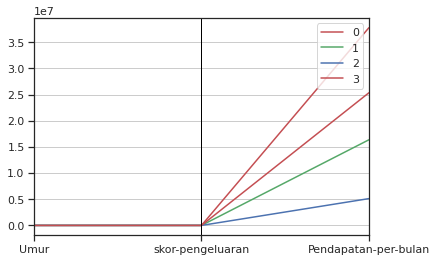

In [ ]:
cols = ['Umur','skor-pengeluaran','Pendapatan-per-bulan']
dfC = pd.DataFrame(kmPP.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b'))
plt.show()